# Bibliotecas

In [43]:
import warnings
import textwrap

import pandas 		     as pd
import numpy             as np
import seaborn			 as sns
import matplotlib.pyplot as plt 

from matplotlib import colormaps

from itertools import product

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.exceptions import ConvergenceWarning

from sklearn.svm import SVR

# Carregando o dataset

In [44]:
studentPerfomace = pd.read_csv("data/Student_Performance.csv")

In [45]:
studentPerfomace.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [46]:
studentPerfomace.shape

(10000, 6)

In [47]:
features = studentPerfomace.columns[:-1]
features

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [48]:
target = studentPerfomace.columns[-1]
target

'Performance Index'

# Pré-processamento do dataset

In [49]:
studentPerfomaceProcessed = studentPerfomace.copy()

Codificação do campo *Extracurricular Activities*

In [50]:
labelBinarizer = LabelBinarizer()

In [51]:
studentPerfomaceProcessed['Extracurricular Activities'] = labelBinarizer.fit_transform(
	y = studentPerfomaceProcessed['Extracurricular Activities']
)

In [52]:
studentPerfomaceProcessed.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0
6,7,73,1,5,6,63.0
7,8,45,1,4,6,42.0
8,5,77,0,8,2,61.0
9,4,89,0,4,0,69.0


Normalização do dataset

In [53]:
scaler = StandardScaler()

In [54]:
studentPerfomaceProcessed[studentPerfomaceProcessed.columns] = scaler.fit_transform(
	X = studentPerfomaceProcessed[studentPerfomaceProcessed.columns]
)

In [55]:
studentPerfomaceProcessed.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.010455,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,1.010455,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,-0.989654,0.866505,0.145333,0.560870
5,-0.769703,0.493263,-0.989654,1.456205,0.494105,0.300610
6,0.775188,0.204950,1.010455,-0.902594,0.494105,0.404714
7,1.161410,-1.409601,1.010455,-1.492294,0.494105,-0.688376
8,0.002742,0.435600,-0.989654,0.866505,-0.900982,0.300610
9,-0.383481,1.127550,-0.989654,-1.492294,-1.598526,0.717025


# Análise exploratória

In [56]:
discreteFeatures = [
	"Hours Studied",
	"Extracurricular Activities",
	"Sleep Hours",
	"Sample Question Papers Practiced"
]

Gráfico de barras para as *features* discretas

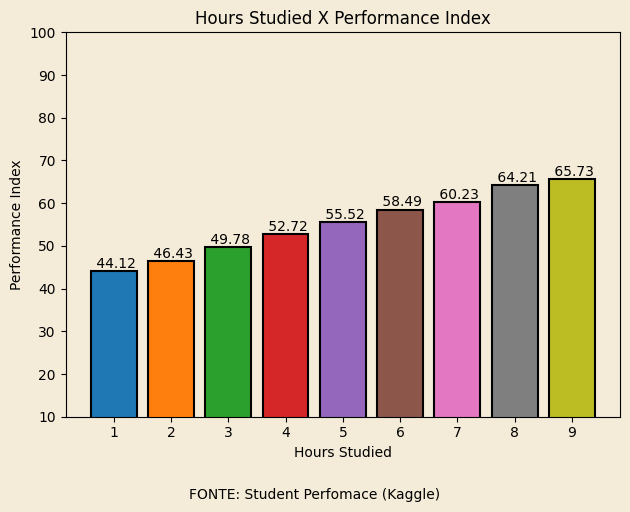

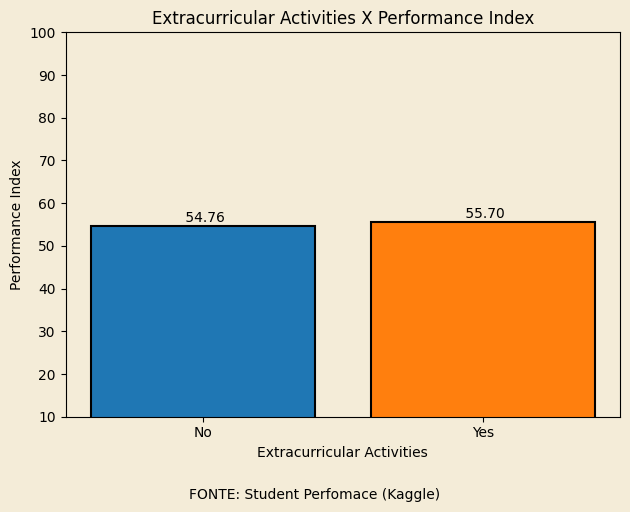

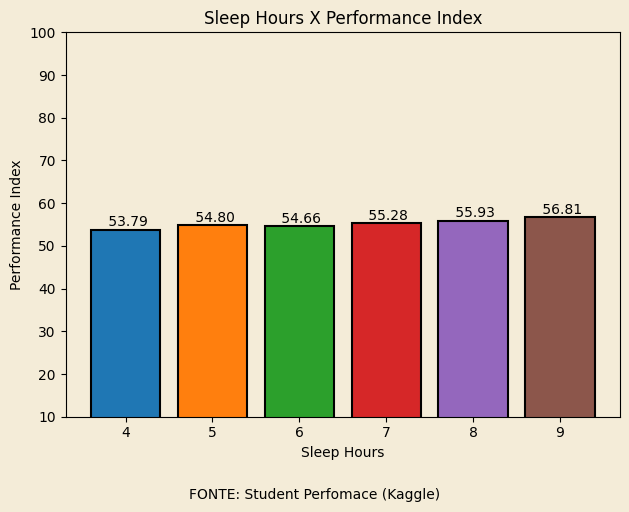

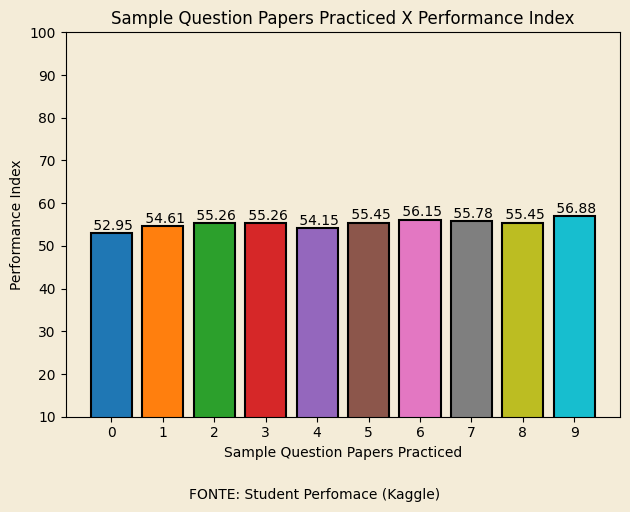

In [ ]:
for feature in discreteFeatures:

	figure = plt.figure()

	plt.title(f'{feature} X Performance Index')

	perfomaceByFeature = studentPerfomace[
		[feature, "Performance Index"]
	].groupby(by = feature).mean()

	bars = plt.bar(
		x         = perfomaceByFeature.index,
		height    = perfomaceByFeature.values.flatten(),
		color     = colormaps.get('tab10').colors,
		edgecolor = 'black',
		linewidth = 1.5
	)

	for i, bar in enumerate(bars):

		height = bar.get_height()

		plt.text(
			perfomaceByFeature.index[i],                   
			height + 0.05,          
			f'{height: .2f}', 
			ha       = 'center',    
			va       = 'bottom',    
			fontsize = 10
		)

	figure.set_facecolor("#F4ECD8")
	figure.axes[0].set_facecolor("#F4ECD8")

	plt.xlabel(feature)
	plt.ylabel("Performance Index")

	plt.xticks(perfomaceByFeature.index)

	plt.ylim(10, 100)

	plt.figtext(
		0.5, -0.05,                 
		'FONTE: Student Perfomace (Kaggle)',  
		horizontalalignment = 'center',
		fontsize            = 10
	)

	plt.tight_layout()

	plt.show()
	plt.close()

Gráfico *Previous Scores* X *Performance Index*

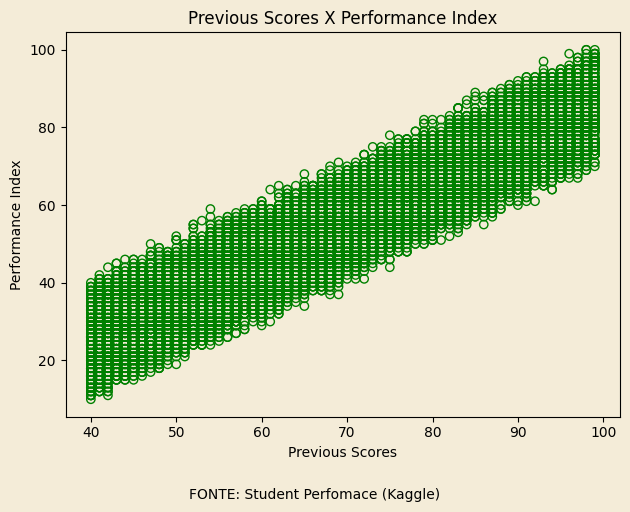

In [58]:
figure = plt.figure()

plt.title(f'Previous Scores X Performance Index')

plt.scatter(
	x 	   = studentPerfomace['Previous Scores'],
	y      = studentPerfomace['Performance Index'],
	fc     = 'none', 
	ec	   = 'g'
)

figure.set_facecolor("#F4ECD8")
figure.axes[0].set_facecolor("#F4ECD8")

plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")

plt.figtext(
	0.5, -0.05,                 
	'FONTE: Student Perfomace (Kaggle)',  
	horizontalalignment = 'center',
	fontsize            = 10
)

plt.tight_layout()

plt.show()
plt.close()

Matriz de correlação

In [59]:
correlationMatrix = studentPerfomaceProcessed.corr()
correlationMatrix

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


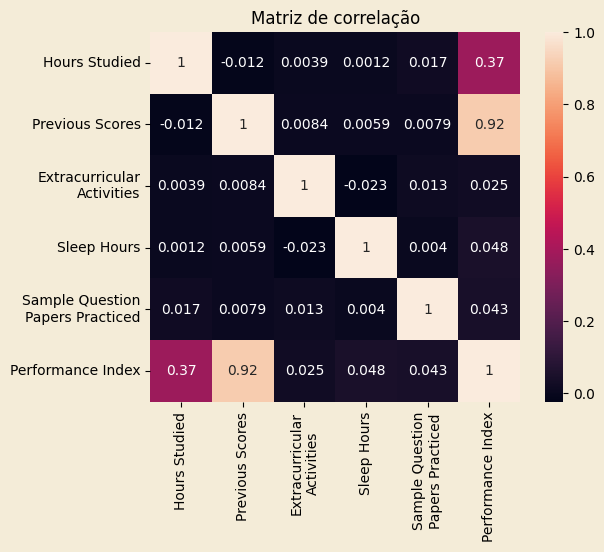

In [60]:
figure = plt.figure()

labels = [textwrap.fill(feature, 20) for feature in studentPerfomaceProcessed.columns]

sns.heatmap(
    data  		= correlationMatrix,
    square		= True,
    annot		= True,
    xticklabels = labels,
    yticklabels = labels,
)

figure.set_facecolor("#F4ECD8")
figure.axes[0].set_facecolor("#F4ECD8")

plt.title('Matriz de correlação')
plt.show()

# Seleção dos atributos

Definição do PCA

In [61]:
class PCA:
	def __init__(self, nComponents: int):
		self.nComponents         = nComponents
		self.principalComponents = None
		self.eigenValues         = None

	def fit(self, X: pd.DataFrame):
		X = X.copy()

		# Centraliza os dados
		X = X - X.mean()

		# Calcula a matriz de covariância
		Rx = X.cov()

		# Autovalores e autovetores
		eigenValues, eigenVectors = np.linalg.eig(Rx)

		# Ordena em ordem decrescente de autovalor
		eigenValuesOrder    = np.argsort(eigenValues)[::-1]
		eigenVectorsOrdered = eigenVectors[:, eigenValuesOrder]

		# Armazena os autovalores ordenados
		self.eigenValues = eigenValues[eigenValuesOrder]

		# Armazena os n autovetores principais (colunas)
		self.principalComponents = eigenVectorsOrdered[:, :self.nComponents]

	def variance(self) -> float:
		return np.sum(self.eigenValues[:self.nComponents]) / np.sum(self.eigenValues)

	def transform(self, X: pd.DataFrame) -> pd.DataFrame:
		return X.dot(self.principalComponents)

	def fit_transform(self, X: pd.DataFrame) -> pd.DataFrame:
		self.fit(X)
		return self.transform(X)

In [62]:
pcas = []

for i in range(5):
	pca = PCA(nComponents = i + 1)
	pcas.append(pca)

Aplicando o PCA ao dataset

In [63]:
studentPerfomacePCAs = []

for pca in pcas:

	pcaFeatures = [f"v{i}" for i in range(pca.nComponents)]

	studentPerfomacePCA = pd.DataFrame(
		columns = pcaFeatures,
		index   = studentPerfomaceProcessed.index
	)

	studentPerfomacePCA[pcaFeatures] = pca.fit_transform(studentPerfomaceProcessed[features])
	studentPerfomacePCA[target]      = studentPerfomaceProcessed[target]
	
	studentPerfomacePCAs.append(studentPerfomacePCA)

Variâncias explicadas ao longo das componentes

In [64]:
for pca in pcas:
	print(f"Com n = {pca.nComponents} componentes = {pca.variance(): .2f}")

Com n = 1 componentes =  0.21
Com n = 2 componentes =  0.41
Com n = 3 componentes =  0.61
Com n = 4 componentes =  0.81
Com n = 5 componentes =  1.00


# Hold-Out do dataset

Do dataset sem PCA

In [65]:
X = studentPerfomaceProcessed[features]
y = studentPerfomaceProcessed[target]

In [66]:
XTrain, XTest, yTrain, yTest = train_test_split(
	X,
	y,
	train_size   = .70,
	random_state = 42
)

print("Amostras para treino =", XTrain.shape[0])
print("Amostras para test   =", XTest.shape[0])

Amostras para treino = 7000
Amostras para test   = 3000


Dos datasets com o PCA

In [67]:
XsTrainPCA = []
XsTestPCA  = []
ysTrainPCA = []
ysTestPCA  = []

In [68]:
for studentPCA in studentPerfomacePCAs:
	XPCA = studentPCA.iloc[:, :-1]
	yPCA = studentPCA.iloc[:, -1]

	XTrainPCA, XTestPCA, yTrainPCA, yTestPCA = train_test_split(
		XPCA,
		yPCA,
		train_size   = .70,
		random_state = 42
	)

	XsTrainPCA.append(XTrainPCA)
	XsTestPCA.append(XTestPCA)
	ysTrainPCA.append(yTrainPCA)
	ysTestPCA.append(yTestPCA)


# Treino

## Com o dataset normal

*Cross-validation* usando o *KFold* ($k = 10$) com *tunning* via *grid search*

Definição dos parametros para o *Grid search*

In [69]:
bestScore  = float('inf')
bestParams = None

In [70]:
kernels = ['linear', 'rbf', 'poly']
Cs      = [1e-2, 1e-1, 1, 10, 100]
gammas  = [1e-2, 1e-1, 1, 10, 100]

grid = product(kernels, Cs, gammas)
grid = list(grid)

In [71]:
print("Pontos na grade =", len(grid))

Pontos na grade = 75


Definição do KFold com $k = 10$

In [72]:
kFold = KFold(n_splits = 10)

Realizando o tunning do modelo

> Em alguns casos do *Grid-Search*, o modelo do SVR não converge (ou não rapido o suficiente). Por isso, foi limitado o número iterações a **max_iter = 10.000**

In [ ]:
# Suprimindo os avisos de convergência
warnings.filterwarnings("ignore", category = ConvergenceWarning)

for i, (kernel, C, gamma) in enumerate(grid):

	model = SVR(
		kernel   = kernel, 
		C	     = C, 
		gamma    = gamma, 
		degree   = 2 if kernel == 'poly' else 0, 
		max_iter = 10_000
	)

	# Aplicando o KFold

	scores = []

	for trainFoldIndex, testFoldIndex in kFold.split(XTrain, yTrain):

		XTrainFold = XTrain.iloc[trainFoldIndex]
		XTestFold  = XTrain.iloc[testFoldIndex]

		yTrainFold = yTrain.iloc[trainFoldIndex]
		yTestFold  = yTrain.iloc[testFoldIndex]


		model.fit(
			X = XTrainFold, 
			y = yTrainFold
		)

		yHat  = model.predict(X = XTestFold)
		score = mean_squared_error(y_true = yTestFold, y_pred = yHat)

		scores.append(score)

	scoresMean = np.mean(scores)

	print(f"{i* 100 / len(grid): .2f}% Kernel = {kernel} C = {C:.2f} gamma = {gamma:.2f} MSE = {scoresMean:.5f}")

	# Armazenando a melhor combinação

	if scoresMean < bestScore:
		bestScore  = scoresMean
		bestParams = (kernel, C, gamma)

Os melhores parametros no tunning

In [74]:
bestKernel, bestC, bestGamma = bestParams

print("Melhores parametros:")
print(f"Kernel = '{bestKernel}' C = {bestC} Gamma = {bestGamma} ")

Melhores parametros:
Kernel = 'linear' C = 0.1 Gamma = 0.01 


Criando o modelo com os melhores parametros

In [75]:
modelWithoutPCA = SVR(
	kernel   = bestKernel,
	C        = bestC,
	gamma    = gamma,
	max_iter = 10_000,
)

In [ ]:
modelWithoutPCA.fit(XTrain, yTrain)

,kernel,'linear'
,degree,3
,gamma,100
,coef0,0.0
,tol,0.001
,C,0.1
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,10000


## Com o dataset do PCA

Criando os modelos

In [77]:
modelsPCA = []

for i in range(len(studentPerfomacePCAs)):
	model = SVR(
		kernel   = bestKernel,
		C        = bestC,
		gamma    = gamma,
		max_iter = 10_000
	)
	
	modelsPCA.append(model)

Treinando os modelos que usam o PCA

In [78]:
for model, XTrainPCA, yTrainPCA in zip(modelsPCA, XsTrainPCA, ysTrainPCA):
	model.fit(
		X = XTrainPCA,
		y = yTrainPCA
	)

# Teste

Do dataset sem PCA

In [79]:
yHat = modelWithoutPCA.predict(XTest)

In [80]:
score = mean_squared_error(y_pred = yHat, y_true = yTest)
r2    = r2_score(y_pred = yHat, y_true = yTest)

In [81]:
print(f"MSE =", round(score, 3))
print(f"R^2 =", round(r2, 3))

MSE = 0.011
R^2 = 0.989


Dos datasets com PCA

In [82]:
scores = []
r2s    = []

In [83]:
for model, XTestPCA, yTestPCA in zip(modelsPCA, XsTestPCA, ysTestPCA):
	
	yHat = model.predict(XTestPCA)
	
	score = mean_squared_error(y_pred = yHat, y_true = yTestPCA)
	r2    = r2_score(y_pred = yHat, y_true = yTestPCA)

	scores.append(score)
	r2s.append(r2)

In [84]:
for pca, score, r2 in zip(pcas, scores, r2s):
	
	print(f"SVR usando o PCA com {pca.nComponents} componentes")
	print(f"MSE =", round(score, 3))
	print(f"R^2 =", round(r2, 3))
	print("")

SVR usando o PCA com 1 componentes
MSE = 0.957
R^2 = 0.045

SVR usando o PCA com 2 componentes
MSE = 0.959
R^2 = 0.044

SVR usando o PCA com 3 componentes
MSE = 0.512
R^2 = 0.489

SVR usando o PCA com 4 componentes
MSE = 0.068
R^2 = 0.932

SVR usando o PCA com 5 componentes
MSE = 0.011
R^2 = 0.989



# Comentário sobre os resultados

Em relação ao resultados dos modelos que utilizaram o PCA com o modelo que não utilizou, temos:

1. Com poucos componentes principais (1 ou 2) há alta perda de informação, aproximadamente, 42% da variância explicada pelo autovetores. Isso leva a modelos ruins ($ R^2 \approx 0 $), pois eles têm poucos dados relevantes para aprender os padrões desses dados. 
2. A partir de 3 componentes, há uma relativa recuperação da variância dos dados originais. O desempenho melhora drasticamente ($ R^2 = 0.489 $), pois o modelo tem acesso a mais características explicativas. 
3. Com 4 ou 5 componentes, o modelo quase recupera toda a informação original tendo $ R^2 \approx 1 $

Dessa forma, nota-se que a aplicação do PCA foi irrelevante visto que o *SVR* teve o mesmo em ambos os casos.